# Data download

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import missingno as msno

In [2]:
df= pd.read_csv('data/raw/raw_merged.csv', sep=';')
df.set_index('date', drop=True, inplace=True)
df.set_index(pd.to_datetime(df.index), inplace=True)
df.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


#### Korekta ujemnej ceny kontraktów na ropę. Przyjąć cenę z dnia roboczego wcześniej (ceny kontraktów spadły poniżej 0 w dniu 20-04-2020)

In [3]:
display(df[df.CrudeOil<0])

df['CrudeOil'] = df.CrudeOil.apply(lambda x : x if x >= 0 else np.NaN)

display(df[df.index == '2020-04-20'])

df.interpolate(method='pad', inplace=True)

display(df[df.index > '2020-04-10'])

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,-36.98,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-20,1686.2,NaN,2823.16,15822.73


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2020-04-14,1741.90,20.15,2846.06,16082.57
2020-04-15,1718.65,19.96,2783.36,15347.56
2020-04-16,1729.50,19.82,2799.55,15378.57
2020-04-17,1692.55,18.31,2874.56,15859.29
2020-04-20,1686.20,18.31,2823.16,15822.73
...,...,...,...,...
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07


In [4]:
dfpc = df.copy()
dfpc = dfpc.pct_change()
dfpc.head()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,NaN,NaN,NaN,NaN
1986-01-03,0.001379,0.017214,0.006155,0.005186
1986-01-06,0.003826,0.020385,-0.001091,0.004457
1986-01-07,0.006098,-0.025631,0.014954,-0.006807
1986-01-08,0.007879,0.000774,-0.027268,-0.008746


In [5]:
# dfpc.to_csv('data/data_returns_clean.csv', sep=';')
# df.to_csv('data/data_nominal_clean.csv', sep=';')

<AxesSubplot:>

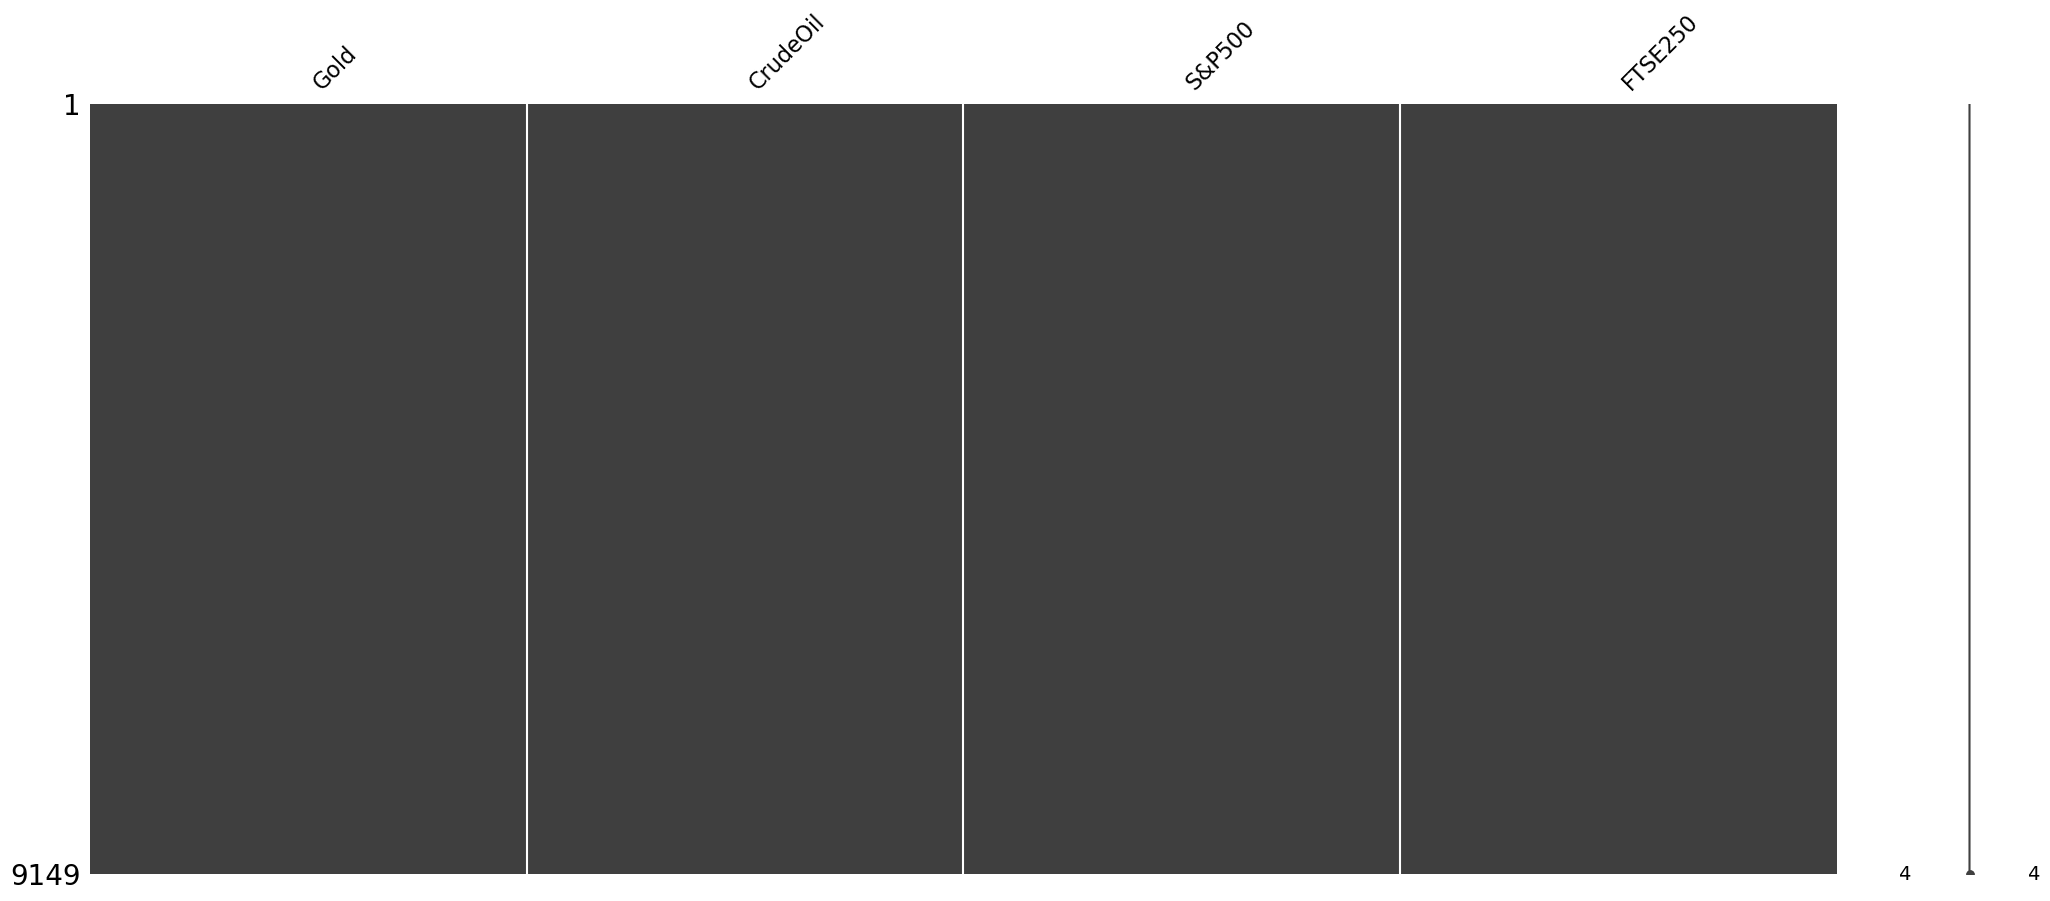

In [6]:
msno.matrix(df)

In [7]:
#df = df.dropna()
display(df.head())
df.tail()

,Gold,CrudeOil,S&P500,FTSE250
date,,,,
1986-01-02,326.30,25.56,209.59,1417.26
1986-01-03,326.75,26.00,210.88,1424.61
1986-01-06,328.00,26.53,210.65,1430.96
1986-01-07,330.00,25.85,213.80,1421.22
1986-01-08,332.60,25.87,207.97,1408.79


,Gold,CrudeOil,S&P500,FTSE250
date,,,,
2022-12-30,1813.75,80.16,3839.50,18853.00
2023-01-03,1843.25,76.87,3824.14,19134.34
2023-01-04,1857.30,72.82,3852.97,19391.07
2023-01-05,1834.00,73.61,3808.10,19463.43
2023-01-06,1852.20,73.77,3895.08,19504.72


---
# PRICE AND RETURNS PLOTS
---

## Gold

Text(0.5, 1.0, 'Gold returns per troy oz 1986-01-02 to 2023-01-06')

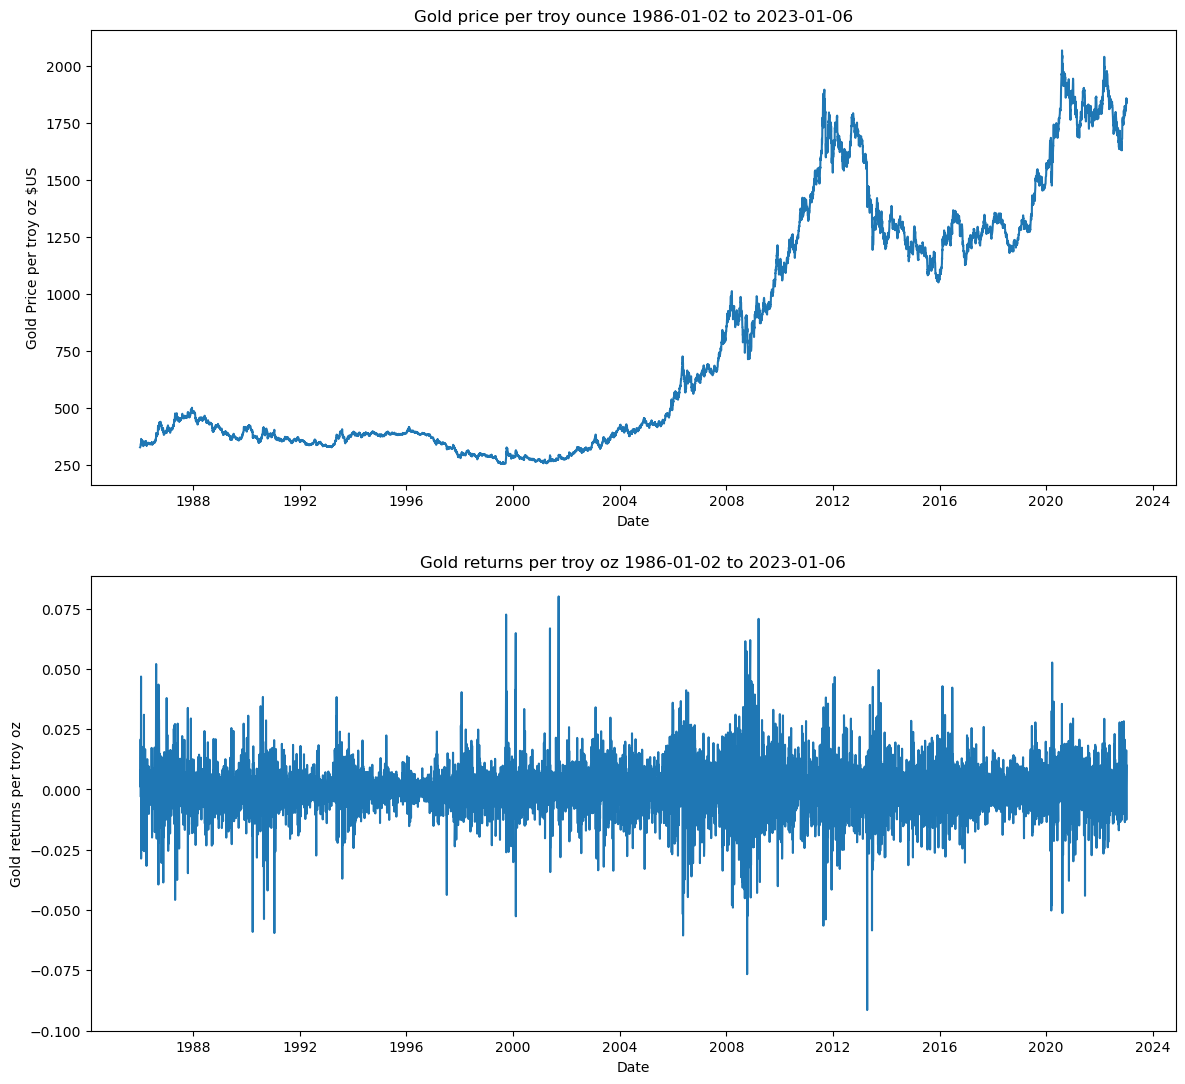

In [8]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='Gold', data=df, ax=ax1)
ax1.set_ylabel('Gold Price per troy oz $US')
ax1.set_xlabel('Date')
ax1.set_title('Gold price per troy ounce 1986-01-02 to 2023-01-06')

sns.lineplot(x=df.index, y='Gold', data=dfpc, ax=ax2)
ax2.set_ylabel('Gold returns per troy oz')
ax2.set_xlabel('Date')
ax2.set_title('Gold returns per troy oz 1986-01-02 to 2023-01-06')


##  Oil 

Text(0.5, 1.0, 'Crude Oil returns 1986-01-02 to 2023-01-06')

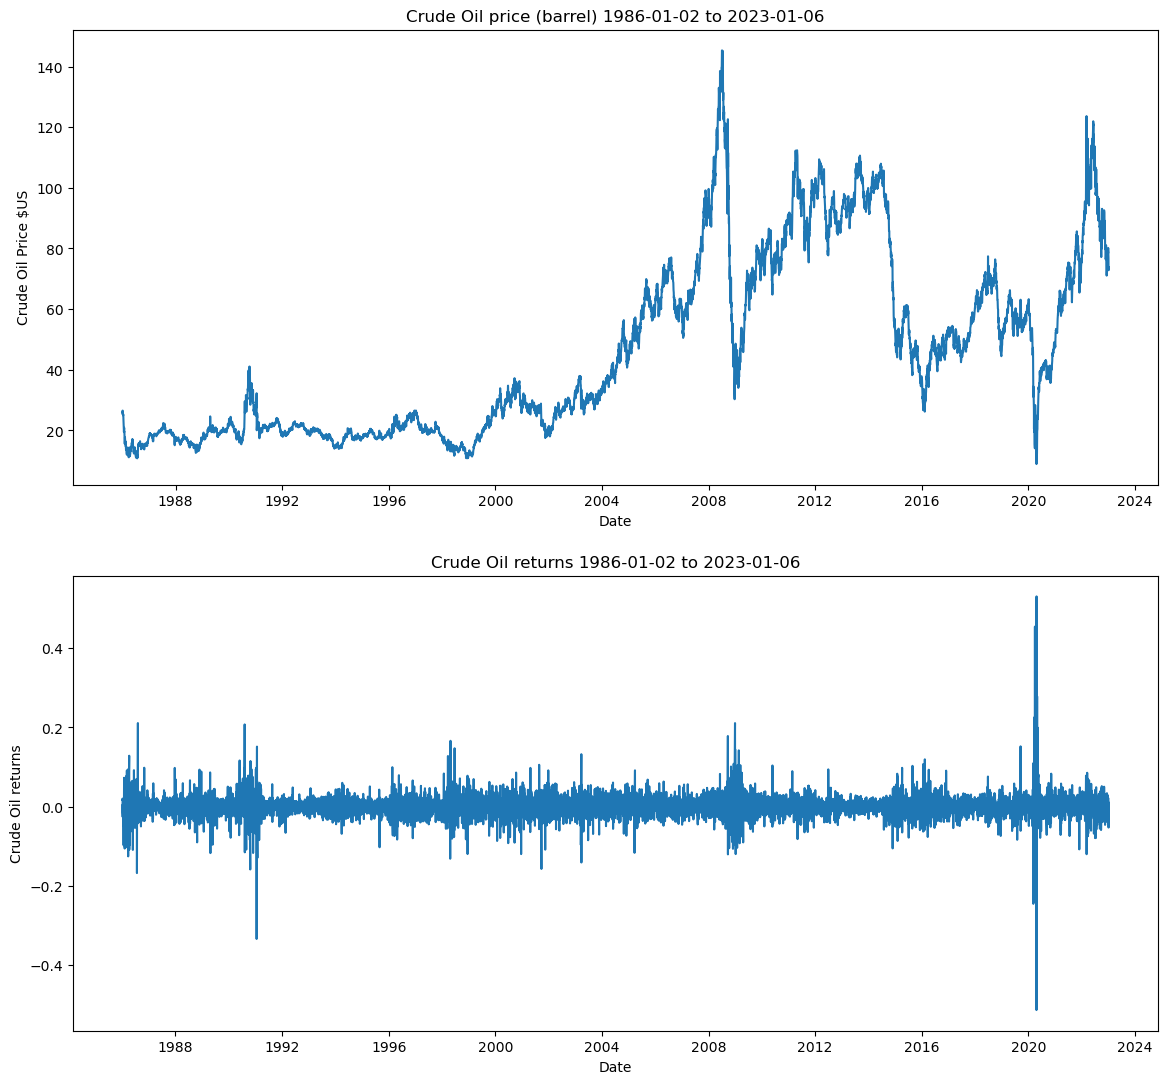

In [16]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='CrudeOil', data=df, ax=ax1)
ax1.set_ylabel('Crude Oil Price $US')
ax1.set_xlabel('Date')
ax1.set_title('Crude Oil price (barrel) 1986-01-02 to 2023-01-06')

sns.lineplot(x=df.index, y='CrudeOil', data=dfpc, ax=ax2)
ax2.set_ylabel('Crude Oil returns')
ax2.set_xlabel('Date')
ax2.set_title('Crude Oil returns 1986-01-02 to 2023-01-06')

## S&P500

Text(0.5, 1.0, 'S&P 500 returns 1986-01-02 to 2023-01-06')

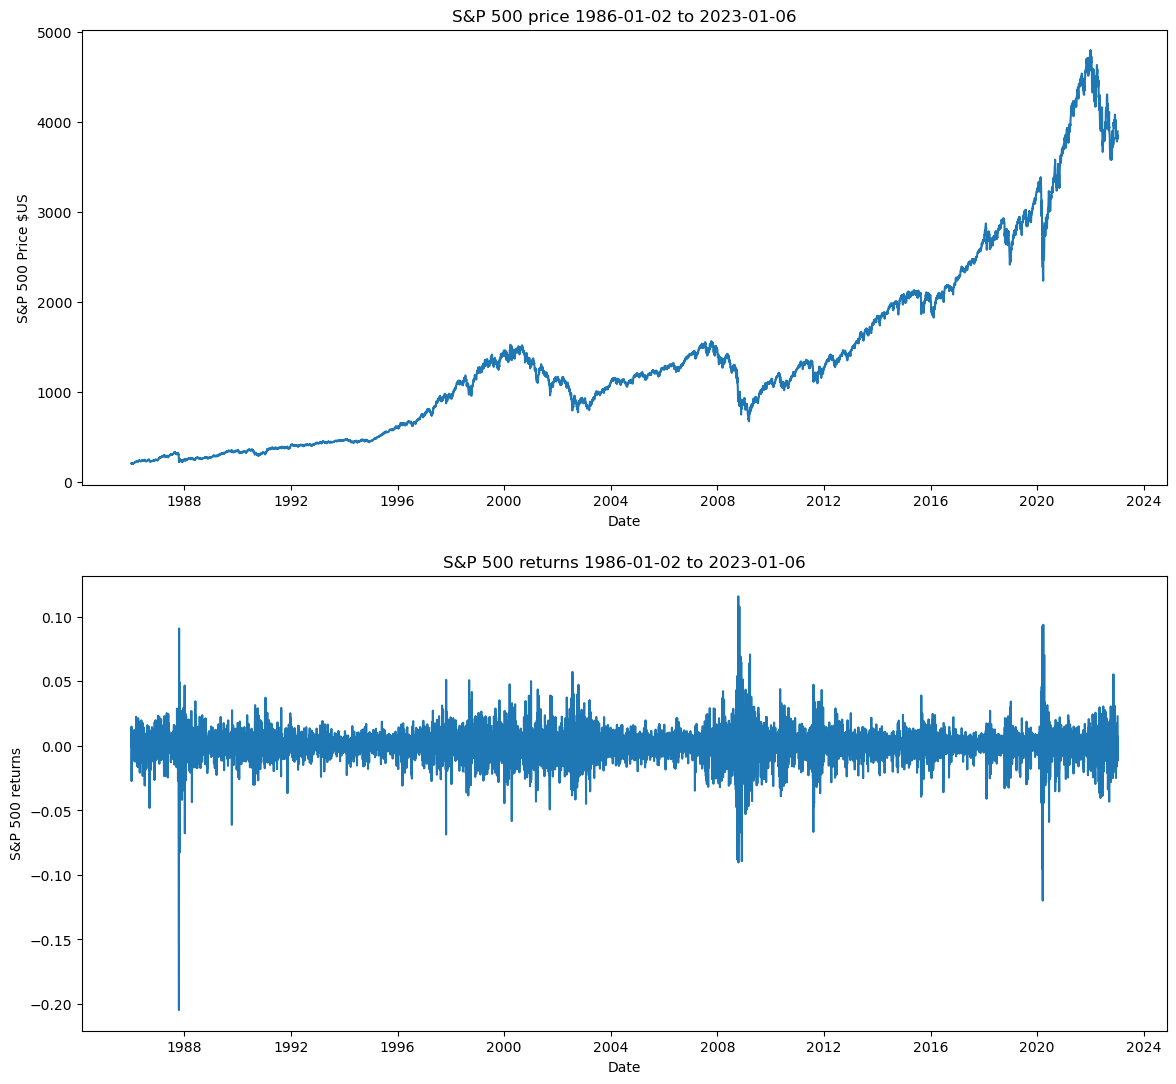

In [10]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='S&P500', data=df, ax=ax1)
ax1.set_ylabel('S&P 500 Price $US')
ax1.set_xlabel('Date')
ax1.set_title('S&P 500 price 1986-01-02 to 2023-01-06')

sns.lineplot(x=df.index, y='S&P500', data=dfpc, ax=ax2)
ax2.set_ylabel('S&P 500 returns')
ax2.set_xlabel('Date')
ax2.set_title('S&P 500 returns 1986-01-02 to 2023-01-06')

## FTSE

Text(0.5, 1.0, 'FTSE250 returns 1986-01-02 to 2023-01-06')

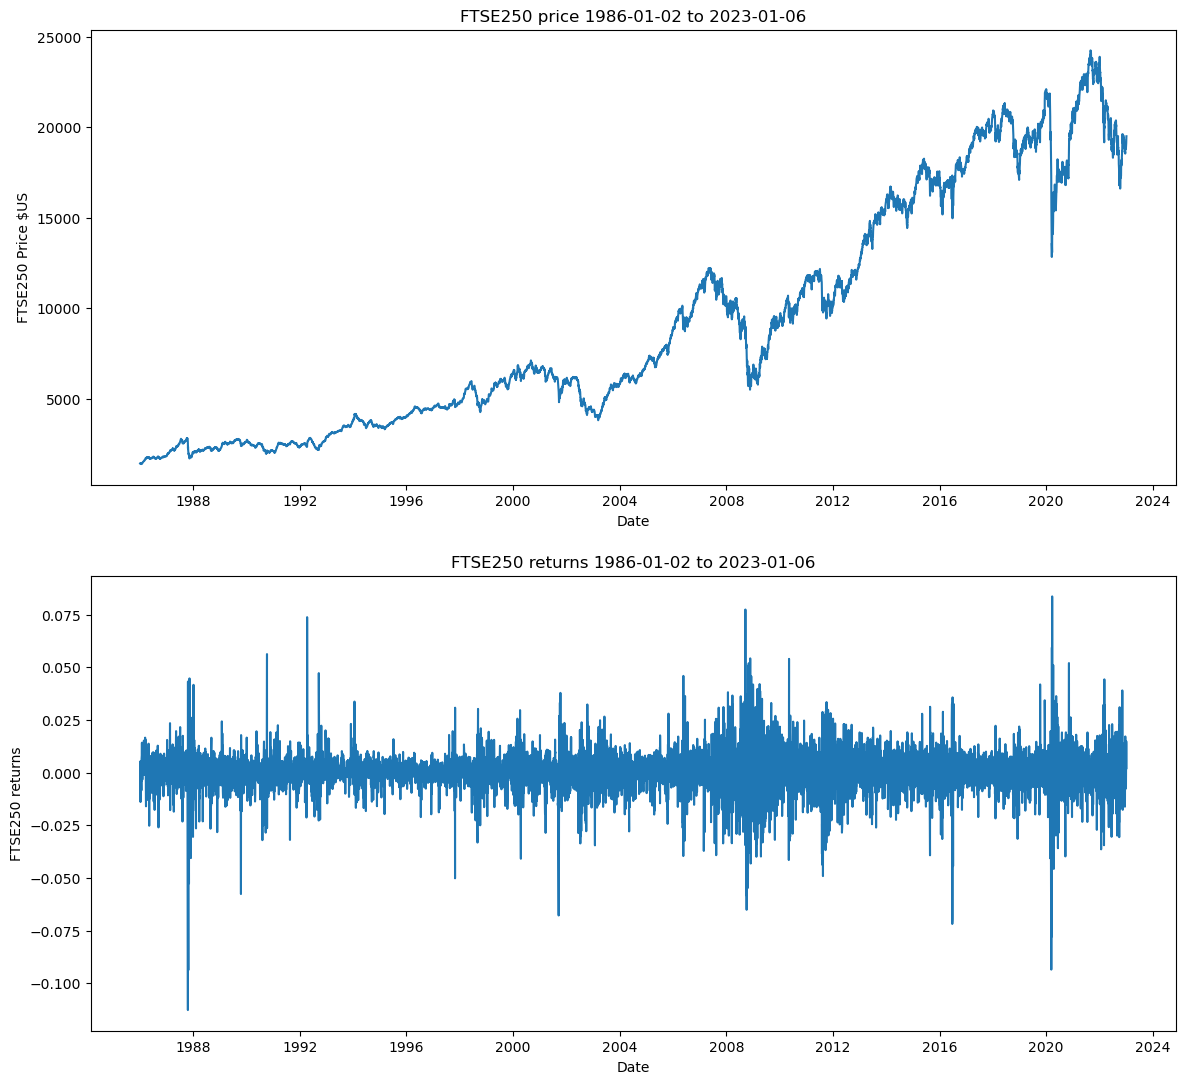

In [11]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,13))
sns.lineplot(x=df.index, y='FTSE250', data=df, ax=ax1)
ax1.set_ylabel('FTSE250 Price $US')
ax1.set_xlabel('Date')
ax1.set_title('FTSE250 price 1986-01-02 to 2023-01-06')

sns.lineplot(x=df.index, y='FTSE250', data=dfpc, ax=ax2)
ax2.set_ylabel('FTSE250 returns')
ax2.set_xlabel('Date')
ax2.set_title('FTSE250 returns 1986-01-02 to 2023-01-06')

---
# CORRELATION

              Gold  CrudeOil    S&P500   FTSE250
Gold      1.000000  0.743332  0.792009  0.870773
CrudeOil  0.743332  1.000000  0.527173  0.646688
S&P500    0.792009  0.527173  1.000000  0.931175
FTSE250   0.870773  0.646688  0.931175  1.000000


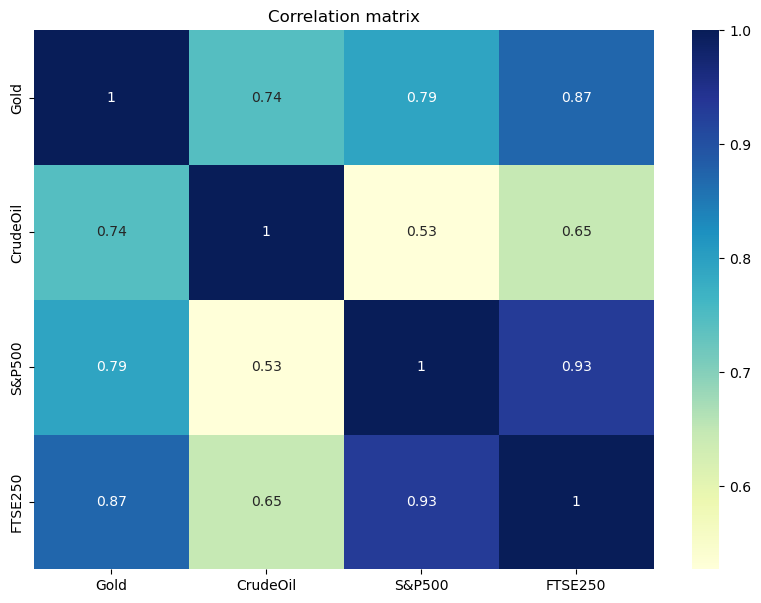

In [12]:
print(df.corr())
  
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr('pearson'), cmap="YlGnBu", annot=True) 
plt.title('Correlation matrix')
plt.show()

In [13]:
dfdesc = df.describe()
dfdesc.to_excel('data/data_descriptive.xlsx', engine='openpyxl')
dfdesc

,Gold,CrudeOil,S&P500,FTSE250
count,9149.000000,9149.000000,9149.000000,9149.000000
mean,789.186769,46.064425,1369.983807,9113.682468
std,527.287005,29.543801,1015.971238,6362.775355
min,252.800000,8.910000,203.490000,1379.400000
25%,361.400000,19.980000,495.520000,3775.300000
50%,442.900000,36.060000,1175.430000,6534.700000
75%,1260.200000,67.000000,1703.200000,14924.880000
max,2067.150000,145.310000,4793.540000,24250.830000


In [14]:
df.columns

Index(['Gold', 'CrudeOil', 'S&P500', 'FTSE250'], dtype='object')

In [15]:
import scipy 
#from sklearn import datasets


dfc = pd.DataFrame()
feat1s = []
feat2s = []
corrs = []
p_values = []

for feat1 in df.columns:
    for feat2 in df.columns:
        if feat1 != feat2:
            feat1s.append(feat1)
            feat2s.append(feat2)
            corr, p_value = scipy.stats.pearsonr(df[feat1], df[feat2])
            corrs.append(corr)
            p_values.append(p_value)

dfc['Feature_1'] = feat1s
dfc['Feature_2'] = feat2s
dfc['Correlation'] = corrs
dfc['p_value'] = p_values
dfc = dfc[['Feature_1', 'Feature_2', 'p_value']]
#dfc.to_csv('data/p_vals.csv', sep=';')

dfc

,Feature_1,Feature_2,p_value
0,Gold,CrudeOil,0.0
1,Gold,S&P500,0.0
2,Gold,FTSE250,0.0
3,CrudeOil,Gold,0.0
4,CrudeOil,S&P500,0.0
5,CrudeOil,FTSE250,0.0
6,S&P500,Gold,0.0
7,S&P500,CrudeOil,0.0
8,S&P500,FTSE250,0.0
9,FTSE250,Gold,0.0
